# Model Klasifikasi 
## Kelompok 4:

- Salsabila Kanaya (2001360)
- Shafa Meira Wahyono (2007723)
- Sri Nanda Ameliani (2008196)
- Yosafat (2009929)

## Sumber Dataset
**Link**: https://www.data-mining-cup.com/reviews/dmc-2019/

## Overview
Beberapa supermarket telah menggunakan sistem *self-scanning* yang memperbolehkan pelanggan untuk meng-*scan* sendiri produk yang ingin dibeli (tidak ada bantuan dari pegawai). Namun, hal ini berisiko pada penipuan yang dilakukan pelanggan dengan cara tidak meng-*scan* barang yang akan dibeli ataupun murni karena kesalahan pada mesin. 

Sebagai tindakan awal untuk menentukan suatu transaksi apakah terindikasi *fraud* atau tidak, maka dibutuhkan model klasifikasi. Dari hasil model tersebut, selanjutnya akan dilakukan *targeted follow-up check*, yaitu proses memeriksa target yang terindikasi *fraud*. Untuk melakukan hal tersebut, diperlukan sebuah model yang awalnya dibuat dari data training. 

## Task
Tujuan dari notebook ini adalah untuk menentukan model klasifikasi yang paling optimal dalam mendeteksi *fraud* menggunakan data training yang sudah ada. Untuk menentukan apakah model yang dibuat bagus atau tidak akan terlihat pada output yang keluar.

## Keterangan Atribut

- **trustLevel** = tingkat kepercayaan secara individu (6 menandakan kepercayaan atau *trust* tertinggi)
- **totalScanTimeInSeconds** = total waktu (detik) antara produk pertama dan terakhir yang di-*scan* (bilangan bulat positif)
- **grandTotal** = jumlah produk yang di-*scan* (bilangan desimal positif dengan 2 angka dibelakang koma)
- **lineItemVoids** = jumlah *scan* yang dibatalkan (bilangan bulat positif)
- **scansWithoutRegistration** = jumlah upaya mengaktifkan *scanner* tanpa benar-benar melakukan proses *scanning*  (bilangan bulat positif atau 0)
- **quantityModification** = jumlah kuantitas produk yang diubah (bilangan bulat positif atau 0)
- **scannedLineItemsPerSecond** =  jumlah rata-rata produk per detik (bilangan desimal positif)
- **valuePerSecond** = rata-rata nilai total produk yang di-*scan* per detik (bilangan desimal positif)
- **lineItemVoidsPerPosition** = jumlah rata-rata item yang kosong per jumlah total semua produk yang di-scan dan tidak dibatalkan (bilangan desimal positif)
- **fraud** = klasifikasi sebagai penipuan atau bukan penipuan (1 = *fraud*, 0 = *not fraud*)

# Import library

In [1]:
%matplotlib inline
import numpy as np                  # library untuk matriks
import pandas as pd                 # library untuk manipulasi dan analisis data
import matplotlib.pyplot as plt     # library untuk visualisasi plot
import seaborn as sns               # library untuk visualisasi plot
import xgboost as xgb               # library untuk model klasifikasi

# Read data 

In [2]:
df = pd.read_csv("C:\\dataSet\\train.csv")    # sesuaikan path
df.head(5)                                                              # menampilkan 5 row teratas

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


# Praproses 
Ada beberapa tahap yang dilakukan pada praproses, antara lain memeriksa tipe data dan jumlah data (apakah sudah tepat merepresentasikan datanya) serta memeriksa *missing value* (data kosong). Jika terdapat beberapa hal yang tidak sesuai, dilakukan penanganan. 

In [3]:
df.info() # menampilkan jumlah data dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [4]:
df.isnull().sum()  # menampilkan akumulasi *missing value*

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

# Exploratory Data Analysis (EDA)

EDA adalah pendekatan menganalisis kumpulan data untuk merangkum karakteristik utamanya, sering kali menggunakan grafik statistik dan metode visualisasi data lainnya. Pada notebook ini, dilakukan pengecekan terhadap distribusi nilai beberapa atribut dan menganalisis korelasi antaratribut.

In [5]:
# menampilkan 5 row teratas
df.head(5)                                        

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


## Pie Chart

In [6]:
df1 = pd.get_dummies(data=df, columns=['trustLevel'])   #untuk mengategorikan tiap level pada atribut trustLevel

Distribusi Atribut trustLevel
trustLevel_1    : 17.67%
trustLevel_2    : 18.47%
trustLevel_3    : 16.92%
trustLevel_4    : 15.38%
trustLevel_5    : 16.07%
trustLevel_6    : 15.49%


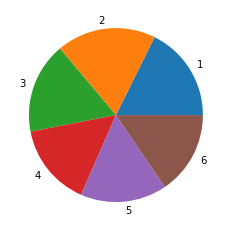

In [7]:
#variabel untuk menampung persentase jumlah per level berdasarkan total data 
av=df1["trustLevel_1"].sum()/1879
aw=df1["trustLevel_2"].sum()/1879
ax=df1["trustLevel_3"].sum()/1879
ay=df1["trustLevel_4"].sum()/1879
az=df1["trustLevel_5"].sum()/1879
a1=df1["trustLevel_6"].sum()/1879


#menampilkan output dalam bentuk persen
print ("Distribusi Atribut trustLevel")
print ("trustLevel_1    : {:.2%}". format(av))
print ("trustLevel_2    : {:.2%}". format(aw))
print ("trustLevel_3    : {:.2%}". format(ax))
print ("trustLevel_4    : {:.2%}". format(ay))
print ("trustLevel_5    : {:.2%}". format(az))
print ("trustLevel_6    : {:.2%}". format(a1))

#memasukan value variabel ke dalam y
y = np.array([format(av), format(aw), format(ax), format(ay), format(az), format(a1)])
mylabels = ["1", "2", "3", "4", "5", "6"]

#menmpilkan pie chart
plt.pie(y, labels = mylabels, normalize=False )
plt.show() 

Dari pie chart di atas, dapat diketahui level 2 adalah yang terbanyak.

## Box Plots

<AxesSubplot:xlabel='quantityModifications'>

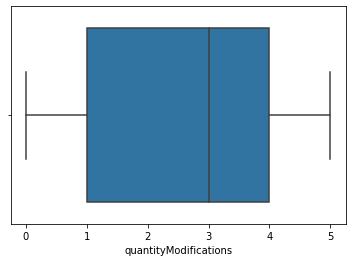

In [8]:
sns.boxplot(x="quantityModifications",data=df)  

Dari box plot di atas, dapat diketahui median memiliki value 3 dan tidak terdapat outlier.

<AxesSubplot:xlabel='grandTotal'>

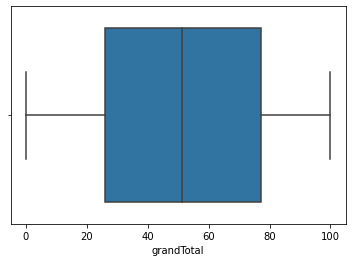

In [9]:
sns.boxplot(x="grandTotal",data=df)  

Dari box plot di atas, dapat diketahui median memiliki value sekitar 40-60 dan tidak terdapat outlier.

## Heatmap (Korelasi Antaratribut)

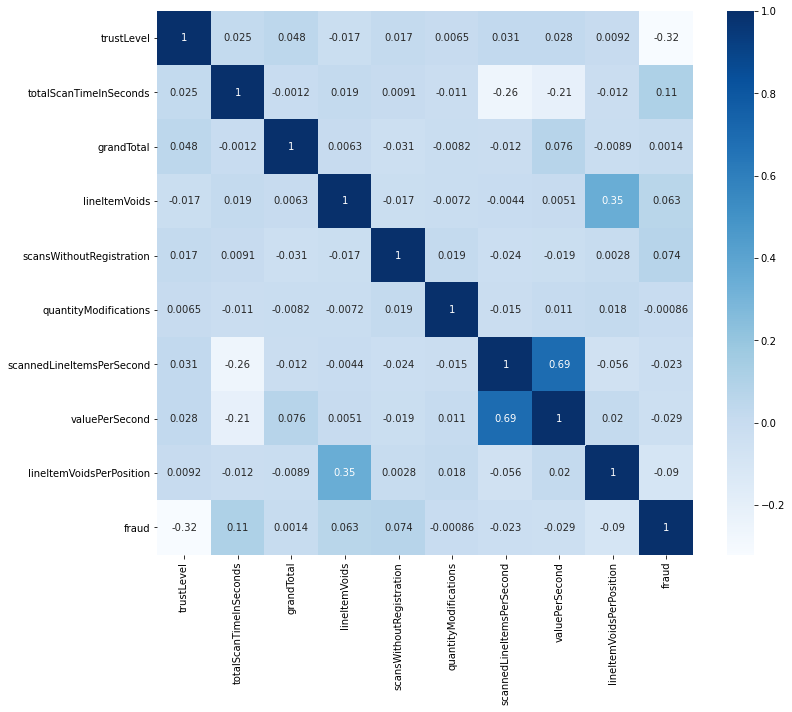

In [10]:
# deklarasi corr sebagai tampungan atribut yang akan dilihat korelasinya
plt.figure(figsize=(12,10))
corr = df[["trustLevel","totalScanTimeInSeconds","grandTotal", "lineItemVoids",
           "scansWithoutRegistration", "quantityModifications", "scannedLineItemsPerSecond", 
           "valuePerSecond", "lineItemVoidsPerPosition", "fraud"]].corr()

# tampilkan sebagai heatmap
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

Pada heatmap diatas dapat diketahui bahwa hubungan antara atribut "scannedLineItemsPerSecond" dan "valuePerSecond" memiliki korelasi yang paling tinggi.

# Model Klasifikasi
## Split Data

Setiap data frame dibagi menjadi 2, yaitu sebagai data train dan data test. Pada data ini, X merupakan data yang digunakan untuk membuat model (tanpa atribut fraud), sehingga dibagi menjadi 2 secara random menjadi X_train dan X_test. Sama halnya dengan Y (label atribut fraud), lalu dibagi menjadi 2 secara random menjadi Y_train dan Y_test.

In [11]:
# import library untuk split data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [12]:
# memasukan label fraud ke variabel Y
Y = (df.fraud) 

In [13]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [14]:
# memasukan atribut yang akan dibuat model ke variabel X
X = df.drop("fraud",axis=1)

In [15]:
X.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [17]:
#simpan nama kolom untuk keperluan prediksi nanti
import pickle
with open('C:\\dataSet\\fraud_x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

## Import Library Model Klasifikasi

In [18]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Decision Tree
from sklearn import tree

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

#Cross Validation
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## Confusion Matrix

Confusion Matrix digunakan untuk menghitung nilai prediksi dan nilai yang sebenarnya. Value yang ada pada confusion matrix terdiri dari:
- true positive = prediksi dan sebenarnya positif (benar)
- false positive = prediksi positif (benar) dan sebenernya negatif (salah) 
- true negative = prediksi dan sebenarnya negatif (salah)
- false negative =  prediksi negatif (salah) dan sebenarnya positif (benar)
























## Naive Bayes

In [19]:
# Memanggil model Naive Bayes yang ditampung pada variabel clf_NB. Sesuaikan dengan data X_train (data frame tanpa atribut 
#      fraud) dan Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)
clf_NB = GaussianNB()                           
clf_NB.fit(X_train, Y_train)                    

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud). Menyimpan nilai akurasi yang diperoleh dari hasil prediksi 
#      yang dites dengan Y_test
Y_pred = clf_NB.predict(X_test)                
acc = accuracy_score(Y_test, Y_pred)          

# Menampilkan output akurasi. Menampikan hasil klasifikasi
print("Akurasi {}".format(acc))                   
print(classification_report(Y_test, Y_pred))     

# Menampilkan output confusion matrix
print(confusion_matrix(Y_test, Y_pred))

print("\n\n~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~\n\n")

# Deklarasi fungsi untuk menampilkan precision, recall, f1-score, dan confusion matrix pada tiap cross validation
def classification_report_with_f1_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    return f1_score(y_true, y_pred)

# menentukan value cross validation
scores = cross_val_score(clf_NB, X=X, y=Y, cv=4,

#menampilkan output pada fungsi classification_report_with_f1_score dan menampilkan output f1-score untuk tiap cross validation
scoring=make_scorer(classification_report_with_f1_score))
print(scores)

Akurasi 0.8670212765957447
              precision    recall  f1-score   support

           0       1.00      0.86      0.93       361
           1       0.23      1.00      0.38        15

    accuracy                           0.87       376
   macro avg       0.62      0.93      0.65       376
weighted avg       0.97      0.87      0.90       376

[[311  50]
 [  0  15]]


~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~


              precision    recall  f1-score   support

           0       0.99      0.82      0.90       444
           1       0.23      0.92      0.36        26

    accuracy                           0.82       470
   macro avg       0.61      0.87      0.63       470
weighted avg       0.95      0.82      0.87       470

[[362  82]
 [  2  24]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       444
           1       0.24      0.96      0.38        26

    accuracy                           0.83   

Dengan menggunakan model Naive Bayes, dapat diketahui:

Naive Bayes tidak dapat menggunakan fungsi **Feature Importances** yang berarti atribut terpenting tidak dapat ditentukan.

[0.36363636 0.38461538 0.416      0.42622951]

**Cross Validation**
Jika menggunakan model Naive Bayes, nilai f1 score pada fraud 1 tidak mengalami perubahan setiap kali syntax predict dan accuracy score dijalankan.

Dari output di atas, nilai f1-score mengalami peningkatan pada tiap cross validation dengan menggunakan model Naive Bayes. Selain itu, setiap kali model Naive Bayes dijalankan, nilai f1 score selalu sama. 

Dari penjelasan di atas, dapat disimpulkan bahwa kinerja model Naive Bayes selalu stabil dan konsisten.

## Decision Tree

In [20]:
# Memanggil model Decision Tree yang ditampung pada variabel clf_DT. Sesuaikan dengan data X_train (data frame tanpa atribut 
#      fraud) dan Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)
clf_DT = tree.DecisionTreeClassifier()           
clf_DT.fit(X_train, Y_train)                     

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud). Menyimpan nilai akurasi yang diperoleh dari hasil prediksi 
#      yang dites dengan Y_test
Y_pred = clf_DT.predict(X_test)                
acc = accuracy_score(Y_test, Y_pred)             

# Menampilkan output akurasi. Menampikan hasil klasifikasi

print("Akurasi {}".format(acc))                   
print(classification_report(Y_test, Y_pred))    

# Menampilkan output confusion matrix
print(confusion_matrix(Y_test, Y_pred))

print("\n\n~~~~~~~~~~~~~~~~~~~~~~Feature Importances~~~~~~~~~~~~~~~~~~~~\n\n")

# Syntax di bawah digunakan untuk menghitung tingkat kepentingan atribut (hasil klasifikasi Random Forest) berdasarkan atribut 
#     yang ada di X_train, lalu diurutkan secara menurun 
feature_importances = pd.DataFrame(clf_DT.feature_importances_,index = X_train.columns, 
                                   columns=['importance']).sort_values('importance',ascending=False)

# Menampilkan hasil tingkat kepentingan atribut
print(feature_importances)   

print("\n\n~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~\n\n")

# Deklarasi fungsi untuk menampilkan precision, recall, f1-score, dan confusion matrix pada tiap cross validation
def classification_report_with_f1_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) #precision, recall, dan f1-score
    print(confusion_matrix(y_true, y_pred)) #confusion matrix
    return f1_score(y_true, y_pred)

# menentukan value cross validation
scores = cross_val_score(clf_DT, X=X, y=Y, cv=4, 

#menampilkan output pada fungsi classification_report_with_f1_score
scoring=make_scorer(classification_report_with_f1_score)) 

#menampilkan output f1-score untuk tiap cross validation
print(scores) #run pertama

Akurasi 0.976063829787234
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       361
           1       0.75      0.60      0.67        15

    accuracy                           0.98       376
   macro avg       0.87      0.80      0.83       376
weighted avg       0.97      0.98      0.97       376

[[358   3]
 [  6   9]]


~~~~~~~~~~~~~~~~~~~~~~Feature Importances~~~~~~~~~~~~~~~~~~~~


                           importance
scannedLineItemsPerSecond    0.242096
totalScanTimeInSeconds       0.217597
trustLevel                   0.196980
lineItemVoidsPerPosition     0.085947
lineItemVoids                0.078029
scansWithoutRegistration     0.054779
valuePerSecond               0.050545
quantityModifications        0.041483
grandTotal                   0.032544


~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       444
      

In [21]:
def classification_report_with_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

# menentukan value cross validation
scores = cross_val_score(clf_DT, X=X, y=Y, cv=4, 

#menampilkan output pada fungsi classification_report_with_f1_score
scoring=make_scorer(classification_report_with_f1_score)) 

#menampilkan output f1-score untuk tiap cross validation
print(scores) #run kedua

[0.61538462 0.74576271 0.71698113 0.62222222]


Dengan menggunakan model Decision Tree, dapat diketahui:

**Feature Importances**

atribut yang paling penting bagi model Decision Tree adalah atribut scannedLineItemsPerSecond karena memiliki value importance yang paling besar.


**Cross Validation**
Jika menggunakan model Decision Tree, nilai f1 score pada fraud 1 akan mengalami perubahan setiap kali syntax predict dan accuracy score dijalankan.

Dari penjelasan di atas, dapat disimpulkan bahwa kinerja model Decision Tree tidak stabil. Hal ini disebabkan, pada model Decision Tree menggunakan random state yang mengontrol starting point sehingga kinerja model Decision tree tidak stabil (berubah-ubah).

## Random Forest

In [22]:
# Memanggil model Random Forest yang ditampung pada variabel clf_RF. Sesuaikan dengan data X_train (data frame tanpa atribut 
#      fraud) dan Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)
clf_RF = RandomForestClassifier(n_estimators=50, random_state=123) 
clf_RF.fit(X_train, Y_train)                                       

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud). Menyimpan nilai akurasi yang diperoleh dari hasil prediksi 
#       yang dites dengan Y_test
Y_pred = clf_RF.predict(X_test)                                    
acc = accuracy_score(Y_test, Y_pred)                               

# Menampilkan output akurasi. Menampikan hasil klasifikasi
print("Akurasi {}".format(acc))                                    
print(classification_report(Y_test, Y_pred))                       

# Menampilkan output confusion matrix
print(confusion_matrix(Y_test, Y_pred))

print("\n\n~~~~~~~~~~~~~~~~~~~~~Feature Importances~~~~~~~~~~~~~~~~~~~\n\n")

# Syntax di bawah digunakan untuk menghitung tingkat kepentingan atribut (hasil klasifikasi Random Forest) berdasarkan atribut 
#   yang ada di X_train, lalu diurutkan secara menurun 
feature_importances = pd.DataFrame(clf_RF.feature_importances_,index = X_train.columns, 
                                   columns=['importance']).sort_values('importance',ascending=False)

# Menampilkan hasil tingkat kepentingan atribut
print(feature_importances)   # Menampilkan hasil tingkat kepentingan atribut

print("\n\n~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~\n\n")

# Deklarasi fungsi untuk menampilkan precision, recall, f1-score, dan confusion matrix pada tiap cross validation
def classification_report_with_f1_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    return f1_score(y_true, y_pred)

# menentukan value cross validation
scores = cross_val_score(clf_RF, X=X, y=Y, cv=4,

#menampilkan output pada fungsi classification_report_with_f1_score
scoring=make_scorer(classification_report_with_f1_score))

#menampilkan output f1-score untuk tiap cross validation
print(scores)

Akurasi 0.9867021276595744
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       361
           1       1.00      0.67      0.80        15

    accuracy                           0.99       376
   macro avg       0.99      0.83      0.90       376
weighted avg       0.99      0.99      0.99       376

[[361   0]
 [  5  10]]


~~~~~~~~~~~~~~~~~~~~~Feature Importances~~~~~~~~~~~~~~~~~~~


                           importance
trustLevel                   0.275139
totalScanTimeInSeconds       0.153191
scannedLineItemsPerSecond    0.149126
lineItemVoidsPerPosition     0.099001
valuePerSecond               0.087869
grandTotal                   0.081010
lineItemVoids                0.072523
scansWithoutRegistration     0.056474
quantityModifications        0.025666


~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       444
       

Dengan menggunakan model Random Forest, dapat diketahui:

**Feature Importances**
fitur yang paling penting bagi model Random Forest adalah fitur trustLevel karena memiliki value importance yang paling besar.

[0.72727273 0.85106383 0.65217391 0.5       ]

**Cross Validation**
Jika menggunakan model Random Forest, nilai f1 score pada fraud 1 tidak mengalami perubahan setiap kali syntax predict dan accuracy score dijalankan.

Dari output di atas, f1-score pada tiap cross validation mengalami fluktuasi.

Dari nilai-nilai tersebut, dapat dipastikan bahwa model Random Forest cukup stabil.

## XGBoost

In [23]:
# Memanggil model XGBoost yang ditampung pada variabel clf_XGB
clf_XGB = xgb.XGBClassifier(use_label_encoder=False, objective = "multi:softprob", num_class = 2, eval_metric =   
"mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01,              
n_estimators = 10, nthread=-1)                                                           

# Sesuaikan dengan data X_train (data frame tanpa atribut fraud) dan Y_train (data frame yang berisi 
#       atribut fraud dengan nilai 0 dan 1)
clf_XGB.fit(X_train, Y_train)                                                        

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud), lalu menyimpan nilai akurasi yang diperoleh 
#   dari hasil prediksi yang dites dengan Y_test
Y_pred = clf_XGB.predict(X_test)                                                        
acc = accuracy_score(Y_test, Y_pred)                                                   

# Menampilkan output akurasi dan menampikan hasil klasifikasi
print("Akurasi {}".format(acc))                                                          
print(classification_report(Y_test, Y_pred))                                     

# Menampilkan output confusion matrix
print(confusion_matrix(Y_test, Y_pred))

print("\n\n~~~~~~~~~~~~~~~~~~~~~~Feature Importances~~~~~~~~~~~~~~~~~~~~\n\n")

# Syntax di bawah digunakan untuk menghitung tingkat kepentingan atribut (hasil klasifikasi Random Forest) berdasarkan 
#      atribut yang ada di X_train, lalu diurutkan secara menurun 
feature_importances = pd.DataFrame(clf_XGB.feature_importances_,index = X_train.columns, 
                                   columns=['importance']).sort_values('importance',ascending=False)

# Menampilkan hasil tingkat kepentingan atribut
print(feature_importances)   

print("\n\n~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~\n\n")

# Deklarasi fungsi untuk menampilkan precision, recall, f1-score, dan confusion matrix pada tiap cross validation
def classification_report_with_f1_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    return f1_score(y_true, y_pred)

# menentukan value cross validation
scores = cross_val_score(clf_XGB, X=X, y=Y, cv=4,

#menampilkan output pada fungsi classification_report_with_f1_score
scoring=make_scorer(classification_report_with_f1_score))

#menampilkan output f1-score untuk tiap cross validation
print(scores)

Akurasi 0.9893617021276596
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       361
           1       1.00      0.73      0.85        15

    accuracy                           0.99       376
   macro avg       0.99      0.87      0.92       376
weighted avg       0.99      0.99      0.99       376

[[361   0]
 [  4  11]]


~~~~~~~~~~~~~~~~~~~~~~Feature Importances~~~~~~~~~~~~~~~~~~~~


                           importance
trustLevel                   0.396237
scannedLineItemsPerSecond    0.135724
totalScanTimeInSeconds       0.117874
lineItemVoidsPerPosition     0.111298
lineItemVoids                0.093490
valuePerSecond               0.066872
scansWithoutRegistration     0.042629
quantityModifications        0.022167
grandTotal                   0.013710


~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       444
     

Dengan menggunakan model XGBoost, dapat diketahui:

**Feature Importances**
fitur yang paling penting bagi model XGBoost adalah fitur trustLevel karena memiliki value importance yang paling besar.

[0.76       0.81481481 0.65217391 0.71111111]

**Cross Validation**
jika menggunakan model XGBoost, nilai f1 score pada fraud 1 tidak mengalami perubahan setiap kali syntax predict dan accuracy score dijalankan.

Dari output di atas, f1-score pada tiap cross validation mengalami fluktuasi.

Dari nilai-nilai tersebut, dapat dipastikan bahwa model XGBoost stabil setiap kali dijalankan.

# Perbaikan Model 

## MinMax Scaler

In [24]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)

In [25]:
# Memanggil model XGBoost yang ditampung pada variabel clf_XGB_mm
clf_XGB_mm = xgb.XGBClassifier(use_label_encoder=False, objective = "multi:softprob", num_class = 2, eval_metric =   
"mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01,              
n_estimators = 10, nthread=-1)                                       

# Sesuaikan dengan data X_train (data frame tanpa atribut fraud) dan 
# Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)
clf_XGB_mm.fit(X_train_minmax, Y_train)                         

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud)
# Menyimpan nilai akurasi yang diperoleh dari hasil prediksi yang dites dengan Y_test
Y_pred = clf_XGB_mm.predict(X_test_minmax)                                                         
acc = accuracy_score(Y_test, Y_pred)                                                     

# Menampilkan output akurasi
print("Akurasi {}".format(acc))                                                           
print(classification_report(Y_test, Y_pred))     

Akurasi 0.9893617021276596
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       361
           1       1.00      0.73      0.85        15

    accuracy                           0.99       376
   macro avg       0.99      0.87      0.92       376
weighted avg       0.99      0.99      0.99       376



Dengan menggunakan minmax scaler, f1 score pada fraud 1 tidak mengalami perubahan dengan kinerja yang sebelumnya.

## SS (Standar Scaler)

In [26]:
ss_scaler = preprocessing.StandardScaler()
X_train_ss = mm_scaler.fit_transform(X_train)
X_test_ss = mm_scaler.transform(X_test)

In [27]:
# Memanggil model XGBoost yang ditampung pada variabel clf_XGB_ss
clf_XGB_ss = xgb.XGBClassifier(use_label_encoder=False, objective = "multi:softprob", num_class = 2, eval_metric = "mlogloss", 
max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01, n_estimators = 10, nthread=-1)                                                           

# Sesuaikan dengan data X_train (data frame tanpa atribut fraud) dan 
# Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)
clf_XGB_ss.fit(X_train_ss, Y_train)                                                          

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud)
# Menyimpan nilai akurasi yang diperoleh dari hasil prediksi yang dites dengan Y_test
Y_pred = clf_XGB_ss.predict(X_test_ss)                                                         
acc = accuracy_score(Y_test, Y_pred)         

# Menampilkan output akurasi 
# Menampikan hasil klasifikasi
print("Akurasi {}".format(acc))                                                        
print(classification_report(Y_test, Y_pred))                                            

Akurasi 0.9893617021276596
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       361
           1       1.00      0.73      0.85        15

    accuracy                           0.99       376
   macro avg       0.99      0.87      0.92       376
weighted avg       0.99      0.99      0.99       376



Dengan menggunakan standar scaler, f1 score pada fraud 1 tidak mengalami perubahan dengan kinerja yang sebelumnya.

## Feature Engineering
### Penambahan Atribut Baru (totalItems)

In [28]:
X["totalItems"] = X["scannedLineItemsPerSecond"] * X["totalScanTimeInSeconds"]

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [30]:
 # Memanggil model XGBoost yang ditampung pada variabel clf_XGB
clf_XGB_new_atribut = xgb.XGBClassifier(use_label_encoder=False, objective = "multi:softprob", num_class = 2, 
    eval_metric = "mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01, n_estimators = 10, nthread=-1)                                                           

# Sesuaikan dengan data X_train (data frame tanpa atribut fraud) dan 
# Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)
clf_XGB_new_atribut.fit(X_train, Y_train)                                                           

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud)
# Menyimpan nilai akurasi yang diperoleh dari hasil prediksi yang dites dengan Y_test
Y_pred = clf_XGB_new_atribut.predict(X_test)                                                         
acc = accuracy_score(Y_test, Y_pred)                                                   

# Menampilkan output akurasi
# Menampikan hasil klasifikasi
print("Akurasi {}".format(acc))                                                           
print(classification_report(Y_test, Y_pred))                                            

Akurasi 0.9893617021276596
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       361
           1       0.92      0.80      0.86        15

    accuracy                           0.99       376
   macro avg       0.96      0.90      0.93       376
weighted avg       0.99      0.99      0.99       376



Dengan menambahkan atribut baru pada dataframe, kinerja model mengalami peningkatan ditandai dengan perubahan nilai f1 score pada fraud 1, dari 0.85 menjadi 0.86.

## PCA (Principal Component Analysis)

In [31]:
from sklearn.decomposition import PCA
ss_scaler = preprocessing.StandardScaler()
X_train_ss = mm_scaler.fit_transform(X_train) #fit hanya di train
X_test_ss = mm_scaler.transform(X_test)
pca = PCA(.75)
X_train_pca = pca.fit_transform(X_train_ss)
X_test_pca = pca.transform(X_test_ss)

In [32]:
 # Memanggil model XGBoost yang ditampung pada variabel clf_XGB
clf_XGB_pca = xgb.XGBClassifier(use_label_encoder=False, objective = "multi:softprob", num_class = 2, eval_metric =  
"mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01, n_estimators = 10, nthread=-1)                                                           

# Sesuaikan dengan data X_train (data frame tanpa atribut fraud) dan 
# Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)
clf_XGB_pca.fit(X_train_pca, Y_train)                                

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud)
# Menyimpan nilai akurasi yang diperoleh dari hasil prediksi yang dites dengan Y_test
Y_pred = clf_XGB_pca.predict(X_test_pca)                                                       
acc = accuracy_score(Y_test, Y_pred) 

# Menampilkan output akurasi dan klasifikasi
print("Akurasi {}".format(acc))                                                         
print(classification_report(Y_test, Y_pred))  

Akurasi 0.9946808510638298
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       361
           1       1.00      0.87      0.93        15

    accuracy                           0.99       376
   macro avg       1.00      0.93      0.96       376
weighted avg       0.99      0.99      0.99       376



Dengan menggunakan PCA dan standar scaler, kinerja model menjadi lebih baik, ditandai dengan f1 score pada fraud 1 bernilai 0.93 yang sebelumnya, jika tidak menggunakan PCA, bernilai 0.86.

## Tuning

### Mengubah subsample dari 0.90 menjadi 0.50

In [33]:
# Memanggil model XGBoost yang ditampung pada variabel clf_XGB
clf_XGB = xgb.XGBClassifier(use_label_encoder=False, objective = "multi:softprob", num_class = 2, eval_metric = "mlogloss", 
                            max_depth = 24, gamma=0.1, subsample = 0.50,learning_rate=0.01, n_estimators = 10, nthread=-1)                                                           

# Sesuaikan dengan data X_train (data frame tanpa atribut fraud) dan [[
# Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)]]
clf_XGB.fit(X_train, Y_train)                                                          

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud)
# Menyimpan nilai akurasi yang diperoleh dari hasil prediksi yang dites dengan Y_test
Y_pred = clf_XGB.predict(X_test)                                                        
acc = accuracy_score(Y_test, Y_pred)                                                   

# Menampilkan output akurasi
# Menampikan hasil klasifikasi
print("Akurasi {}".format(acc))                                                         
print(classification_report(Y_test, Y_pred))                                           

Akurasi 0.9920212765957447
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       361
           1       0.93      0.87      0.90        15

    accuracy                           0.99       376
   macro avg       0.96      0.93      0.95       376
weighted avg       0.99      0.99      0.99       376



Setelah mengubah hyperparameter subsample dari 0.90 menjadi 0.50, kinerja menurun jika dibandingkan dengan penggunaan PCA dan standar scaler yang ditandai nilai f1 score pada fraud 1 bernilai 0.90. Maka dari itu, dapat diketahui bahwa perubahan hyperparameter ini akan memengaruhi kinerja model.

### Mengubah subsample, learning_rate, n_estimators

In [34]:
# Memanggil model XGBoost yang ditampung pada variabel clf_XGB
clf_XGB = xgb.XGBClassifier(use_label_encoder=False, objective = "multi:softprob", num_class = 2, eval_metric =  "mlogloss", 
                            max_depth = 24, gamma=0.1, subsample = 0.50,learning_rate=0.5, n_estimators = 20, nthread=-1)                                                           

# Sesuaikan dengan data X_train (data frame tanpa atribut fraud) dan 
# Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)
clf_XGB.fit(X_train, Y_train)                                     

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud)
# Menyimpan nilai akurasi yang diperoleh dari hasil prediksi yang dites dengan Y_test
Y_pred = clf_XGB.predict(X_test)                                                       
acc = accuracy_score(Y_test, Y_pred)                                                   

# Menampilkan output akurasi
# Menampikan hasil klasifikasi
print("Akurasi {}".format(acc))                                                          
print(classification_report(Y_test, Y_pred))                                            

Akurasi 0.9946808510638298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       0.93      0.93      0.93        15

    accuracy                           0.99       376
   macro avg       0.97      0.97      0.97       376
weighted avg       0.99      0.99      0.99       376



Setelah mengubah 3 hyperparameter yaitu:
- subsample dari 0.9 menjadi 0.5
- n_estimators dari 10 menjadi 20
- learning rate pada xgboost dari 0.01 menjadi 0.1, 

Dengan kombinasi ketiganya dibandingkan dengan sebelum perubahan 
- fraud(0) 0.99 -> 1.00
- fraud(1) 0.86 -> 0.93

Kemudian, jika dibandingkan dengan perbaikan model PCA dan standar scaler, dapat dikatakan kinerja model dengan perbaikan tuning lebih baik hal ini disebabkan recall yang dihasilkan dari perbaikan tuning (recall = 0.93) lebih tinggi nilainya dibanding perbaikan PCA dan standar scaler (recall = 0.87).